In [1]:
import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import numpy as np

#set number of nodes
n=100

#initial heat distribution 
phi_0 = [0]*n

for r in random.sample(range(0,10), 5):                        #set intitial heat values, phi_0 by random values
    phi_0[r] = random.randint(0,5)

3.92


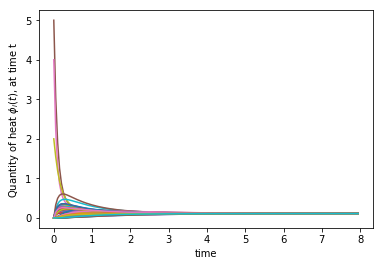

In [2]:
###standard diffusion for Barabasi network####

m=2
G = nx.barabasi_albert_graph(n, m, seed=None)     #Create Barabasi network
while (nx.is_connected(G)==False):                # check if network is connected
    G = nx.barabasi_albert_graph(n, m, seed=None)
    
deg = list(G.degree)
avedegree = np.mean([d[1] for d in deg])          # compute average degree
print(avedegree)

L = nx.laplacian_matrix(G).todense()             # to cater for no longrange interactions
    
D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0)   #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,8,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.show()

4.16


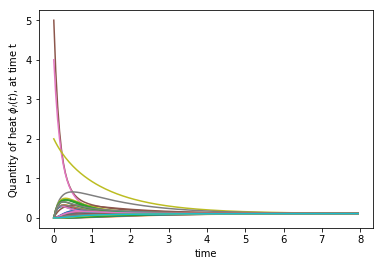

In [3]:
###standard diffusion for ER network####

p=0.041
G = nx.gnp_random_graph(n, p, seed=None, directed=False)     #Create Barabasi network
while (nx.is_connected(G)==False):                      # check if network is connected
    G = nx.gnp_random_graph(n, p, seed=None, directed=False)
    
deg = list(G.degree)
avedegree = np.mean([d[1] for d in deg])          # compute average degree
print(avedegree)

L = nx.laplacian_matrix(G).todense()             # to cater for no longrange interactions
    
D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0)   #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,8,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.show()

In [28]:
import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import numpy as np

#set number of nodes
n=100

#initial heat distribution 
phi_0 = [0]*n

for r in random.sample(range(0,10), 5):                        #set intitial heat values, phi_0 by random values
    phi_0[r] = random.randint(0,5)

time = np.arange(0,5,0.05)
nt = len(time)
inter = 50

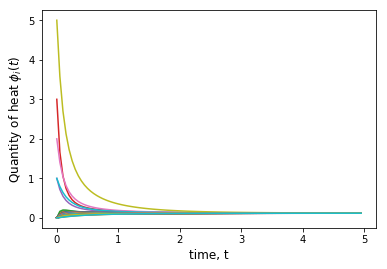

3.92


In [29]:
###standard diffusion for Barabasi network####
m=2
data_arr = np.zeros((inter,nt,n))
pt_len = []
av_lst =[]

for g in range(inter):

    G = nx.barabasi_albert_graph(n, m, seed=None)     #Create Barabasi network
    while (nx.is_connected(G)==False):                # check if network is connected
        G = nx.barabasi_albert_graph(n, m, seed=None)

    deg = list(G.degree)
    avedegree = np.mean([d[1] for d in deg])          # compute average degree
    av_lst.append(avedegree)

    L = nx.laplacian_matrix(G).todense()             # to cater for no longrange interactions

    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0)   #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    phi_lst=[]  
    tt=0
    for t in time :                             #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
        Phi = np.dot(V,Phi);  
        #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
        #phi_lst.append((Phi.ravel()).tolist())
        data_arr[g,tt]= (Phi.ravel()).tolist()
        tt = tt+1

ln = len(data_arr)
sum_arr = np.zeros((nt,n))
for k in range(ln):
    sum_arr = sum_arr + data_arr[k]
sum_av = np.multiply(sum_arr,(1.0/inter))

plt.plot(time,sum_av.tolist())
plt.xlabel('time, t', fontsize=12)
plt.ylabel('Quantity of heat $\phi_i(t)$', fontsize=12)
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/Barabasi-normalDiffusion.eps', format='eps', dpi=1000)
plt.show()
print(np.mean(av_lst))

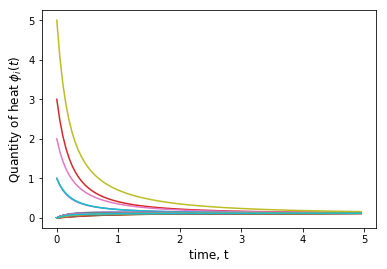

4.1564000000000005


In [30]:
###standard diffusion for ER network####

p=0.041

data_arr = np.zeros((inter,nt,n))
pt_len = []
av_lst =[]

for g in range(inter):

    G = nx.gnp_random_graph(n, p, seed=None, directed=False)     #Create Barabasi network
    while (nx.is_connected(G)==False):                      # check if network is connected
        G = nx.gnp_random_graph(n, p, seed=None, directed=False)

    deg = list(G.degree)
    avedegree = np.mean([d[1] for d in deg])          # compute average degree
    av_lst.append(avedegree)

    L = nx.laplacian_matrix(G).todense()             # to cater for no longrange interactions

    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0)   #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    phi_lst=[]  
    tt=0
    for t in time :                             #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
        Phi = np.dot(V,Phi);  
        #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
        #phi_lst.append((Phi.ravel()).tolist())
        data_arr[g,tt]= (Phi.ravel()).tolist()
        tt = tt+1

ln = len(data_arr)
sum_arr = np.zeros((nt,n))
for k in range(ln):
    sum_arr = sum_arr + data_arr[k]
sum_av = np.multiply(sum_arr,(1.0/inter))

plt.plot(time,sum_av.tolist())
plt.xlabel('time, t', fontsize=12)
plt.ylabel('Quantity of heat $\phi_i(t)$', fontsize=12)
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/E-R-normalDiffusion.eps', format='eps', dpi=1000)
plt.show()
print(np.mean(av_lst))